# Ahmad Saleem Mirza

## Research question/interests
The aim of this notebook is to answer not one big broad question like 'Which is the best team in the world?', but rather focus on more specific and precise questions to demonstrate the depth of the competitive landscape of Rocket League. To this end, I will be attempting to answer the following questions:
- What play styles, ground or aerial, are more successful in winning games?
- How do playstyles, aggressive or passive, differ between team across different regions?
- How can you improve your goalkeeping?

In [ ]:
import pandas as pd
import numpy as np
import project_functions1 as pf 
import seaborn as sns
import matplotlib.pyplot as plt

pd.options.mode.chained_assignment = None  # default='warn'

First, we will import our raw data file and examine the columns to see what sort of data we're dealing with here:

In [ ]:
raw = pd.read_csv('../data/raw/matches_by_teams.csv')
raw.head()

,match_id,color,team_id,team_slug,team_name,team_region,core_shots,core_goals,core_saves,core_assists,...,positioning_time_neutral_third,positioning_time_offensive_third,positioning_time_defensive_half,positioning_time_offensive_half,positioning_time_behind_ball,positioning_time_in_front_ball,demo_inflicted,demo_taken,score,winner
0,6159ad3d143c37878b2384a9,blue,6020bc8ef1e4807cc700391a,https://octane.gg/teams/391a-ground-zero-gaming,GROUND ZERO GAMING,Oceania,34.0,9.0,8.0,7.0,...,973.23,733.45,1967.99,1237.05,2339.78,865.27,6.0,7.0,3,True
1,6159ad3d143c37878b2384a9,orange,614c8930f8090ec745286474,https://octane.gg/teams/6474-ranga-roundup,RANGA ROUNDUP,Oceania,15.0,5.0,21.0,3.0,...,1060.71,526.78,2209.56,998.99,2318.26,890.30,7.0,6.0,0,False
2,6159ad3d143c37878b2384aa,blue,6020bc70f1e4807cc70023fb,https://octane.gg/teams/23fb-renegades,RENEGADES,Oceania,46.0,21.0,10.0,21.0,...,1247.16,892.76,1972.65,1505.61,2616.06,862.25,11.0,7.0,3,True
3,6159ad3d143c37878b2384aa,orange,6156d4db143c37878b238367,https://octane.gg/teams/8367-trident-esports,TRIDENT ESPORTS,Oceania,16.0,4.0,16.0,3.0,...,1001.96,434.29,2600.17,859.84,2355.02,1105.02,7.0,11.0,0,False
4,6159ad3d143c37878b2384ab,blue,6020bc8ef1e4807cc7003915,https://octane.gg/teams/3915-dire-wolves,DIRE WOLVES,Oceania,46.0,12.0,13.0,9.0,...,1586.90,998.94,2900.66,1718.97,3444.64,1174.96,13.0,8.0,3,True


These first 5 rows give us a sample of how are data looks like. But I cannot see all of the columns as there are so many! Let's grab a list to see which ones we need to keep and which ones to discard.

In [ ]:
raw.columns

Index(['match_id', 'color', 'team_id', 'team_slug', 'team_name', 'team_region',
       'core_shots', 'core_goals', 'core_saves', 'core_assists', 'core_score',
       'core_shooting_percentage', 'boost_bpm', 'boost_bcpm',
       'boost_avg_amount', 'boost_amount_collected', 'boost_amount_stolen',
       'boost_amount_collected_big', 'boost_amount_stolen_big',
       'boost_amount_collected_small', 'boost_amount_stolen_small',
       'boost_count_collected_big', 'boost_count_stolen_big',
       'boost_count_collected_small', 'boost_count_stolen_small',
       'boost_amount_overfill', 'boost_amount_overfill_stolen',
       'boost_amount_used_while_supersonic', 'boost_time_zero_boost',
       'boost_time_full_boost', 'boost_time_boost_0_25',
       'boost_time_boost_25_50', 'boost_time_boost_50_75',
       'boost_time_boost_75_100', 'movement_total_distance',
       'movement_time_supersonic_speed', 'movement_time_boost_speed',
       'movement_time_slow_speed', 'movement_time_ground',
   

That's a lot of columns and some of them are too detailed for my case study here: there are so many columns regarding boost usage and positioning, among others. I do not need data this verbose, so I'll clean my data set by removing both columns I do not need and rows with incorrect data.

In [ ]:
df = pf.load_clean('../data/raw/matches_by_teams.csv')
df

,match_id,team_name,team_region,core_shots,core_goals,core_saves,core_assists,movement_total_distance,air_time,defense_time,offense_time,demo_inflicted,score,winner
0,6159ad3d143c37878b2384a9,GROUND ZERO GAMING,Oceania,34.0,9.0,8.0,7.0,4694698.0,210.83,1967.99,1237.05,6.0,3,True
1,6159ad3d143c37878b2384a9,RANGA ROUNDUP,Oceania,15.0,5.0,21.0,3.0,4774768.0,175.53,2209.56,998.99,7.0,0,False
2,6159ad3d143c37878b2384aa,RENEGADES,Oceania,46.0,21.0,10.0,21.0,5098012.0,238.28,1972.65,1505.61,11.0,3,True
3,6159ad3d143c37878b2384aa,TRIDENT ESPORTS,Oceania,16.0,4.0,16.0,3.0,4893312.0,174.47,2600.17,859.84,7.0,0,False
4,6159ad3d143c37878b2384ab,DIRE WOLVES,Oceania,46.0,12.0,13.0,9.0,6680885.0,290.85,2900.66,1718.97,13.0,3,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10589,62e02371da9d7ca1c7bb2f61,TEAM BDS,Europe,61.0,18.0,29.0,14.0,10010525.0,523.30,4201.51,2630.25,19.0,4,True
10590,62e02371da9d7ca1c7bb2f62,G2 ESPORTS,North America,46.0,14.0,38.0,12.0,9022216.0,485.48,3871.85,2162.11,22.0,4,True
10591,62e02371da9d7ca1c7bb2f62,FAZE CLAN,North America,50.0,5.0,26.0,4.0,8961362.0,459.89,3731.48,2281.36,15.0,2,False
10592,62e02371da9d7ca1c7bb2f63,TEAM BDS,Europe,36.0,10.0,19.0,8.0,7387374.0,355.54,3358.93,1685.25,11.0,4,True


So far, we can see that each row is a game between two teams and each game has a unique match ID. Whilst the match_id does give us some unique details about the game if we search it up on a relevant database, it doesn't do much here. 

How would I know which level of which tournament this game took place in? How do I distinguish between the first round of a regional tournament versus the grand final of the world championship? For that, I will merge the necessary columns from another csv file.

In [ ]:
#Importing Regional and Splits from 'main.csv'

result = pf.merge_dfs(df, '../data/raw/main.csv', 'match_id')
result

,match_id,team_name,team_region,core_shots,core_goals,core_saves,core_assists,movement_total_distance,air_time,defense_time,offense_time,demo_inflicted,score,winner,event,event_split
0,6159ad3d143c37878b2384a9,GROUND ZERO GAMING,Oceania,34.0,9.0,8.0,7.0,4694698.0,210.83,1967.99,1237.05,6.0,3,True,Regional 1,Fall
1,6159ad3d143c37878b2384a9,RANGA ROUNDUP,Oceania,15.0,5.0,21.0,3.0,4774768.0,175.53,2209.56,998.99,7.0,0,False,Regional 1,Fall
2,6159ad3d143c37878b2384aa,RENEGADES,Oceania,46.0,21.0,10.0,21.0,5098012.0,238.28,1972.65,1505.61,11.0,3,True,Regional 1,Fall
3,6159ad3d143c37878b2384aa,TRIDENT ESPORTS,Oceania,16.0,4.0,16.0,3.0,4893312.0,174.47,2600.17,859.84,7.0,0,False,Regional 1,Fall
4,6159ad3d143c37878b2384ab,DIRE WOLVES,Oceania,46.0,12.0,13.0,9.0,6680885.0,290.85,2900.66,1718.97,13.0,3,True,Regional 1,Fall
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8657,62e02371da9d7ca1c7bb2f61,TEAM BDS,Europe,61.0,18.0,29.0,14.0,10010525.0,523.30,4201.51,2630.25,19.0,4,True,World Championship,Summer
8658,62e02371da9d7ca1c7bb2f62,G2 ESPORTS,North America,46.0,14.0,38.0,12.0,9022216.0,485.48,3871.85,2162.11,22.0,4,True,World Championship,Summer
8659,62e02371da9d7ca1c7bb2f62,FAZE CLAN,North America,50.0,5.0,26.0,4.0,8961362.0,459.89,3731.48,2281.36,15.0,2,False,World Championship,Summer
8660,62e02371da9d7ca1c7bb2f63,TEAM BDS,Europe,36.0,10.0,19.0,8.0,7387374.0,355.54,3358.93,1685.25,11.0,4,True,World Championship,Summer


Now I have two columns clearly showing when the matches took place. And now I can remove the match_id column.

In [ ]:
result = result.drop(columns=['match_id'])
result

,team_name,team_region,core_shots,core_goals,core_saves,core_assists,movement_total_distance,air_time,defense_time,offense_time,demo_inflicted,score,winner,event,event_split
0,GROUND ZERO GAMING,Oceania,34.0,9.0,8.0,7.0,4694698.0,210.83,1967.99,1237.05,6.0,3,True,Regional 1,Fall
1,RANGA ROUNDUP,Oceania,15.0,5.0,21.0,3.0,4774768.0,175.53,2209.56,998.99,7.0,0,False,Regional 1,Fall
2,RENEGADES,Oceania,46.0,21.0,10.0,21.0,5098012.0,238.28,1972.65,1505.61,11.0,3,True,Regional 1,Fall
3,TRIDENT ESPORTS,Oceania,16.0,4.0,16.0,3.0,4893312.0,174.47,2600.17,859.84,7.0,0,False,Regional 1,Fall
4,DIRE WOLVES,Oceania,46.0,12.0,13.0,9.0,6680885.0,290.85,2900.66,1718.97,13.0,3,True,Regional 1,Fall
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8657,TEAM BDS,Europe,61.0,18.0,29.0,14.0,10010525.0,523.30,4201.51,2630.25,19.0,4,True,World Championship,Summer
8658,G2 ESPORTS,North America,46.0,14.0,38.0,12.0,9022216.0,485.48,3871.85,2162.11,22.0,4,True,World Championship,Summer
8659,FAZE CLAN,North America,50.0,5.0,26.0,4.0,8961362.0,459.89,3731.48,2281.36,15.0,2,False,World Championship,Summer
8660,TEAM BDS,Europe,36.0,10.0,19.0,8.0,7387374.0,355.54,3358.93,1685.25,11.0,4,True,World Championship,Summer


Now with a clean dataset, we can start answering the questions we outlined.

# Q1: What play styles (ground, aerial) have higher chances to win a game?

First, we will determine whether a playstyle was ground or aerial based by taking the average of the time spent in the air in each game. Any air_times greater than this will result in an aerial playstyle, while air times lower than that will be a ground playstyle. This process goes on in the functions file, so all we need to do here is plot the resulting dataframe.

We will divide the win counts based on when the match was played in the year.

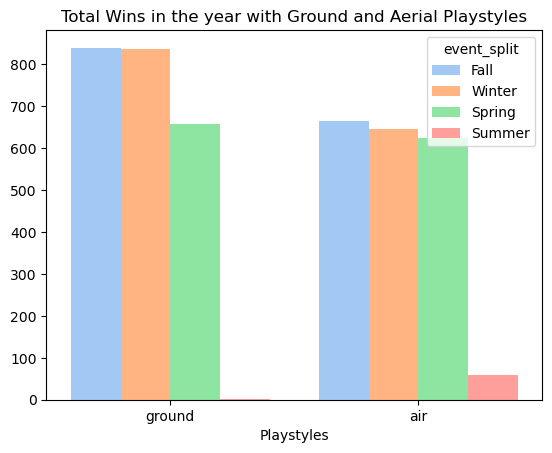

In [ ]:
mean_air_time = df["air_time"].mean()

q1_total = pf.play_style_stats(result, mean_air_time)

total_plot = sns.countplot(data=q1_total, x = "playstyle", hue="event_split",palette='pastel', saturation=1)
total_plot.set(xlabel='Playstyles', ylabel='', title="Total Wins in the year with Ground and Aerial Playstyles")

plt.show()

As we can see, playing on the ground more often has a higher winrate than playing in the air.

This makes no sense though. In Rocket League, an aerial playstyle requrie a lot more precision and skill to perform, as compared to a ground based playstyle (by default you drive on the ground anyways). 
Therefore, the only players who manage to perform aerial maneuvers are those at the top of the game. If these top performers are already so skillful, why is it that they are losing more often?

To answer this, we will look at the matches played at the highest levels only: LANs. Whereas other matches were divided by region, LANs (also called Majors) include the best teams from all around the world, and represent the highest level of competition when it comes to professional Rocket League.

Let's limit our search to only matches with that were played at LANs (the highest level of competition).

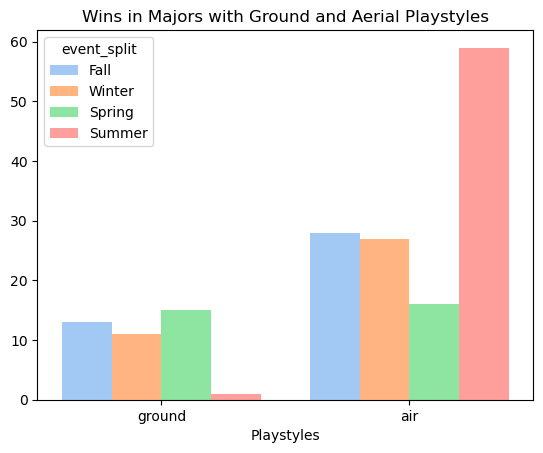

In [ ]:
x = result[(result['event'] == "Major") | (result['event'] == "World Championship")]
q1_majors = pf.play_style_stats(x, mean_air_time)

major_plot = sns.countplot(data=q1_majors, x = "playstyle", hue="event_split",palette='pastel', saturation=1, order=['ground','air'])
major_plot.set(xlabel='Playstyles', ylabel='', title="Wins in Majors with Ground and Aerial Playstyles")
plt.show()

Now an aerial playstyle has a higher winrate than a ground one! We learn from this that the higher up the leaderboard you go, teams lean towards an increasingly air-focused playstyle of the game to be as competitive as possible.

So to answer the original question, while teams can get away with winning with an ground playstyle is easier-going tournaments (non-majors), they will have to learn to play in the air more often to be competitive at a higher level.

# Q2: How do playstyles, aggressive or passive, differ across different regions? 

First we need to classify what constitutes an aggressive or passive playstyle. If a team has an above average distance travelled, demolitions inflicted and shots made towards the enemy goal, then we can classify that team's performance as being aggressive. If not, then the team is passive.

Based on this factors, I have assigned a new column to the data called 'agg_pass' and labeled the rows accordingly in my python function. I will then plot a violin plot so I can see examine not only the median and interquartile ranges but also distribution of games played aggressively and passively across each region.

[Text(0.5, 0, 'Goals'),
 Text(0, 0.5, ''),
 Text(0.5, 1.0, 'Distribution of Aggressive and Passive games across Regions')]

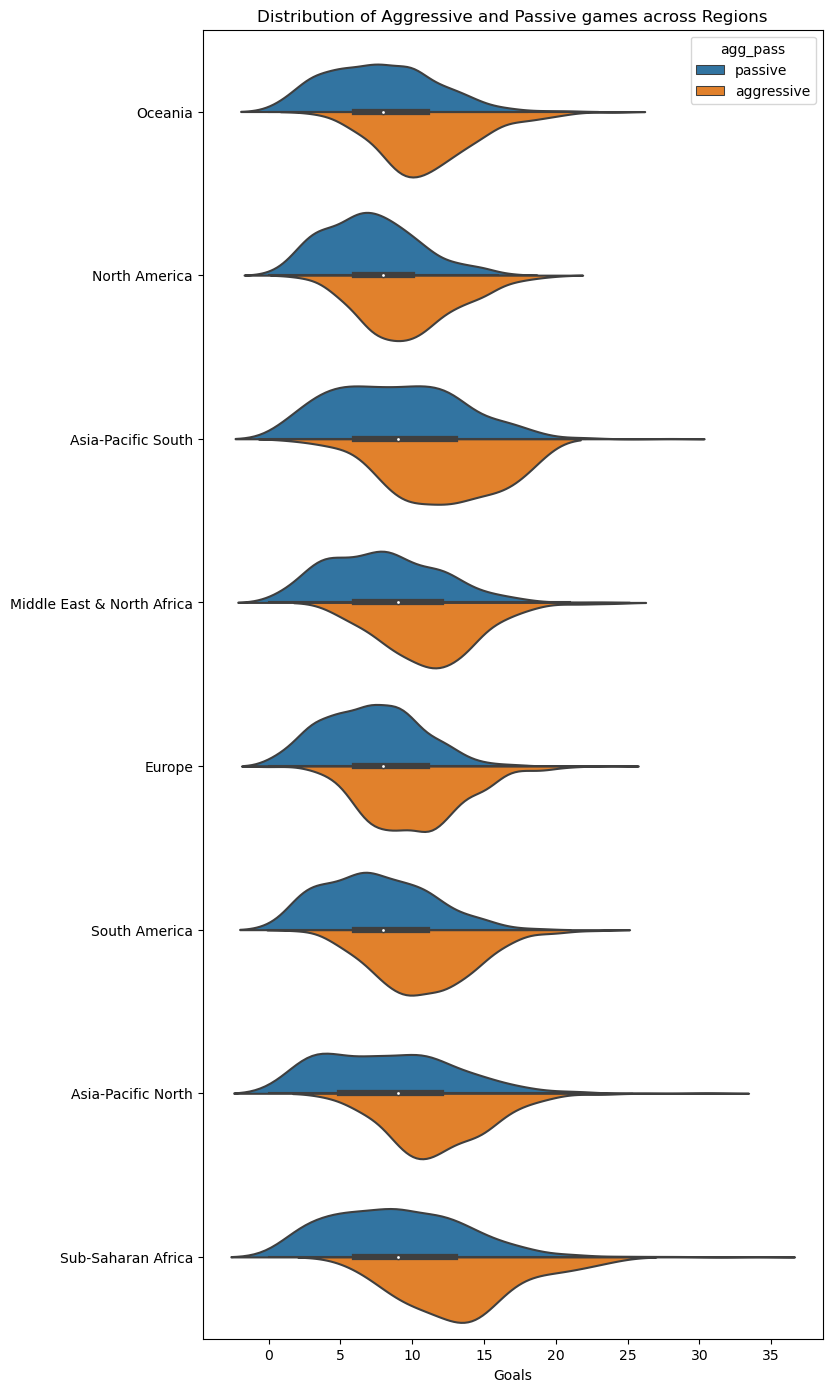

In [ ]:
q2 = pf.region_agg(result)

plt.figure(figsize=(8,17))
sns.violinplot(x='core_goals',y='team_region',data=q2, hue='agg_pass',split=True).set(xlabel="Goals", ylabel="", title="Distribution of Aggressive and Passive games across Regions")

Immediately, we can see that between the two playstyles, every region has managed to score more goals by playing aggressively. We can tell this by looking at the aggressive distribution being farther along the x axis as compared to the passive distribution.

Moving onto our question about which region plays the most aggressively, we need to look at aggressive distribution curves that are more skewed toward the right (more goals scored aggressively).

Judging by this criteria, the most aggressive region is **Asia-Pacific South**. Looking at the shape of the graph, we can see it is more flat shaped at the top as compared to those for other regions, like the **Middle East** for example, where there is a prominent peak in the middle. This flatter shape for Asia Pacific South represents less variation in the playing styles of players from that region: they stick that playing aggressively for their games and that is clearly shown in the kinds of goals they manage to score.

On the other hand, in **Europe** the aggressive graph is much more uneven as compared to the rest. We also see it is unique in that it matches up more closely with it's passive counterpart compared to other regions. We learn from these two points that the European teams generally have a more balanced playstyle than other regions, scoring an equal number of goals both passively and aggressively.

Another point of note is the end of the curve for **Sub-Saharan Africa**. While in other regions distribution goes to 0 after the 20 goal mark, the African teams go beyond that upto the 25 goal mark. This shows a select few African teams that are more successful with their aggressive game style than others. However, that is not enough to make Sub-Saharan Africa the most aggressive region overall.

# Q3: How can teams improve their goalkeeping?
We can judge a team's goal keeping ability by look the number of saves that team made. I will be looking at the number of saves of winning teams only. 

I will need some different data for this question, so I will be making a new dataset for this question from the raw one.

In [ ]:
q3 = raw.filter(['core_saves', 'positioning_time_defensive_third','positioning_time_neutral_third',
                 'positioning_time_offensive_third', 'movement_total_distance', 'positioning_time_in_front_ball',
                 'positioning_time_behind_ball','demo_taken', 'winner'])
q3 = q3.drop(q3[q3.winner == False].index)
q3 = q3.drop(columns=['winner'])

Now that we have all of our required data, I'll make a heatmap to find out any correlations behind the different columns, to try and see what contributes to good goalkeeping (saving ability).

[Text(0.5, 1.0, 'Relationship of Field Positioning and Saves Made')]

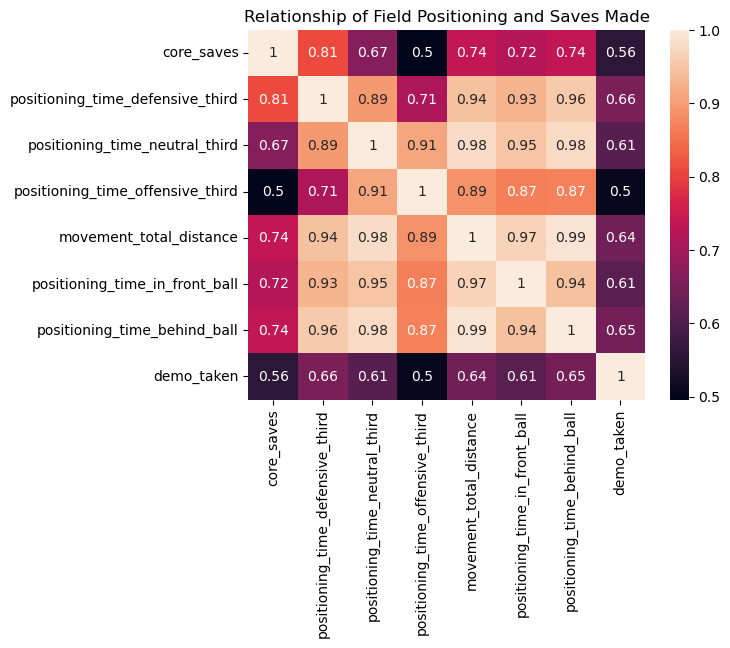

In [ ]:
sns.heatmap(q3.corr(), annot=True).set(title="Relationship of Field Positioning and Saves Made")

We can see there is a strong relationship between the time spent in the defensive third and number of saves. Slightly less stronger but still a positive correlation is the movement_total_distance and time_spent_behind_the_ball.

Also note the high correlation between movement_total_distance and time_behind and time_in_front of the ball. We'll come back to this.

The raw data also includes information about a team's boost usage. Let's see if we can find any discernable relationship there that relates to our saving ability.

Text(0.5, 1.08, 'Boost Management and Saves Made')

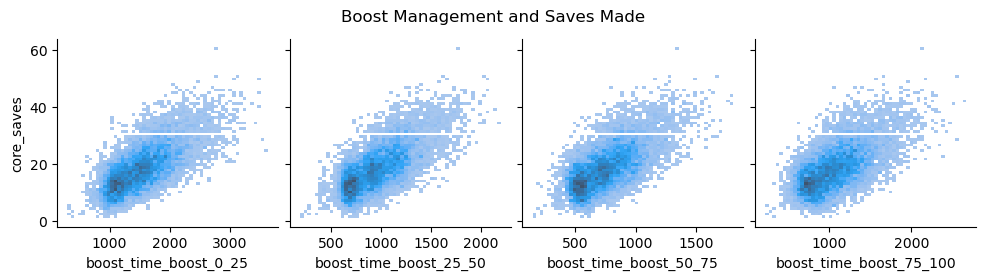

In [ ]:
q3_boost = raw.filter(['core_saves','boost_time_boost_0_25',
       'boost_time_boost_25_50', 'boost_time_boost_50_75',
       'boost_time_boost_75_100'])
sns.pairplot(q3_boost, x_vars =['boost_time_boost_0_25',
       'boost_time_boost_25_50', 'boost_time_boost_50_75',
       'boost_time_boost_75_100'], y_vars = ["core_saves"], kind="hist").fig.suptitle("Boost Management and Saves Made", y=1.08)

   *The y-axis represents the total time spent while the boost was between 0-25, 25-50, 50-75 and 75-100, allowing us see how teams were managing their boost*

No luck. While there is a positive relationship with each other (the more boost you have, the quicker you can block the shots that are being made towards your goal), there isn't any more useful information we can gather from this categorization of different boost levels. The graphs all look the same!

Let's go back to my original relation: time spent in the defensive third of the court and the number of saves made.

Obviously, you cannot stay on your side of the field sitting idle and expect to be good goalkeeper. Not only do you have to have to move forward towards the offensive third to score goals, but sitting idle means you're also at risk of being bumped and temporarily out of the game by an enemy teammate, leaving the goal wide open.

So we know we should stay in the defensive third of the field more, but what exactly do we do there?

The answer? **Move around!** (This game mechanic is called **rotation**)

<seaborn.axisgrid.JointGrid>

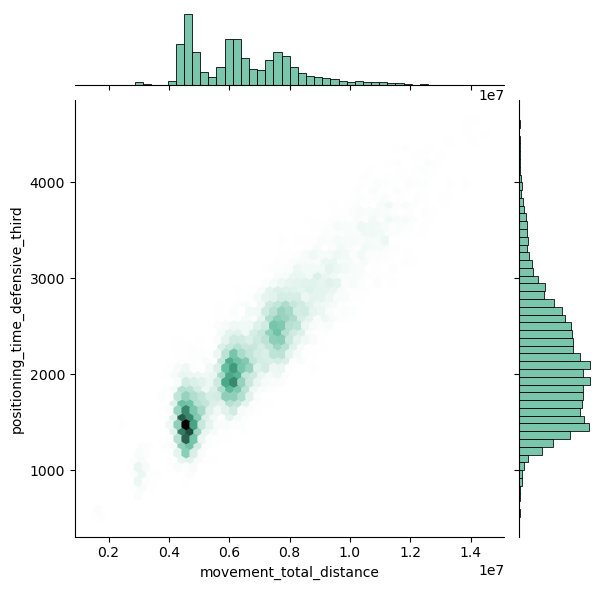

In [ ]:
sns.jointplot(y='positioning_time_defensive_third', x='movement_total_distance', data=raw, kind='hex', color="#4CB391")

As we see here, total_distance has a strong positive correlation with the time spent in the defensive third. We also saw in the heatmap earlier that movement_total_distance further had a strong relation with time_spent_behind_ball and time_spent_in_front_ball (almost identical).

We learn from this that the players on winning teams are constantly rotating around the position of the ball to try and predict where it will go next so they can get to it first. They are not just blindly chasing after the ball to try and slam it into the goal (this game mechanic is called **ball chasing**). We can see there is no ball chasing happening here because of the strong relation between time_spent_behind_ball and time_spent_in_front_ball (if there was, the player would be spending significantly more time behind the ball).

So to answer our question about how players can improve their goalkeeping, *they should focus less on their boost reading and more on **rotating** around the ball and making educated judgements about what sort of plays are possible from there.*